# Comparison of Nuclear Models with Machine Learning:

---
Authors: Kunal Singh, Tanishka Manjrekar

Subject: Atomic & Nuclear Physics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import os
from numpy.lib.function_base import meshgrid
from matplotlib import cm

# ***SEMF Model:***

In [ ]:
def SEMF(Z, N):
    aV, aS, aC, aA, delta = 15.75, 17.8, 0.711, 23.7, 11.18
    Z, N = np.atleast_1d(Z), np.atleast_1d(N)
    A = Z + N
    sgn = np.zeros(Z.shape)
    sgn[(Z%2) & (N%2)] = -1
    sgn[~(Z%2) & ~(N%2)] = +1

    E = (aV - aS / A**(1/3) - aC * Z**2 / A**(4/3) -
         aA * (A-2*Z)**2/A**2 + sgn * delta/A**(3/2))
    if Z.shape[0] == 1:
        return float(E)
    return E

# ***Independent Machine Learning  Model***

## For Stable Isotopes

267
error for independent ml model:  0.4313417496887486 
error for SEMF 2.9308181752642652


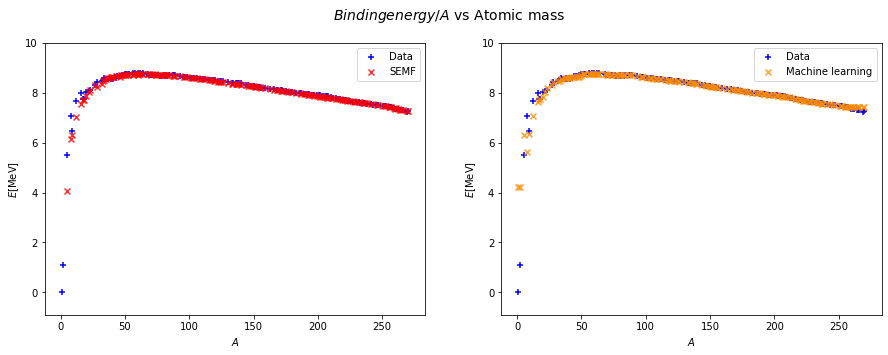

In [ ]:
np.random.seed(2)

infile = open('/content/drive/Shareddrives/MSc 1 Sem 2/Atomic and Nuclear/AME2020.txt','r')
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12),
              header=2,
              index_col=False)

Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
Masses['Ebinding'] /= 1000
Masses = Masses.groupby('A')
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])

Z=Masses['Z']
N=Masses['N']
Z=np.array(Z)
N=np.array(N)
A = Masses['A']
A=np.array(A)
print(len(A))
Energies = Masses['Ebinding']
Energies=np.array(Energies)




index=np.arange(0,len(A))
ri=np.random.choice(index,100,replace=False)
Etrain=[]
Atrain=[]

Ztrain=[]
Ntrain=[]
for i in ri:
  e1=Energies[i]
  a1=A[i]
  z1=Z[i]
  n1=N[i]
  Etrain.append(e1)
  Atrain.append(a1)
  Ztrain.append(z1)
  Ntrain.append(n1)
Etest=np.delete(Energies,ri)
Atest=np.delete(A,ri)
Ntest=np.delete(N,ri)
Ztest=np.delete(Z,ri)

Eapptrain=SEMF(Ztrain,Ntrain)
Eapptest=SEMF(Ztest,Ntest)


X = np.zeros((1,len(Atrain)))
X[0,:] = Atrain


from sklearn.tree import DecisionTreeRegressor

regr_3=RandomForestRegressor(max_depth=30)

regr_3.fit(X.T, Etrain)
Xtest = np.zeros((1,len(Atest)))
Xtest[0,:] = Atest
y_3=regr_3.predict(Xtest.T)



err1=(mean_squared_error(Etest,y_3,squared=False))
err2=mean_squared_error(Etest,Eapptest,squared=False)
print('error for independent ml model: ',err1,'\nerror for SEMF',err2)





# Plot the results
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax1.scatter(Atest, Eapptest, color="red", label="SEMF", marker='x',alpha=0.8)
ax2.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax2.scatter(Atest, y_3, color="darkorange", label="Machine learning", marker='x',alpha=0.8)
ax1.set_xlabel(r'$A$')
ax1.set_ylabel(r"$E$[MeV]")
ax2.set_xlabel(r'$A$')
ax2.set_ylabel(r"$E$[MeV]")
fig.suptitle("$Binding energy/A$ vs Atomic mass ",fontsize=14)
ax1.legend()
ax2.legend()
ax1.set_ylim(-0.9,10)
ax2.set_ylim(-0.9,10)
plt.show()


## For All Isotopes

2549
error for independent ml model:  0.21235006695813696 
error for SEMF:  1.0382852227640964


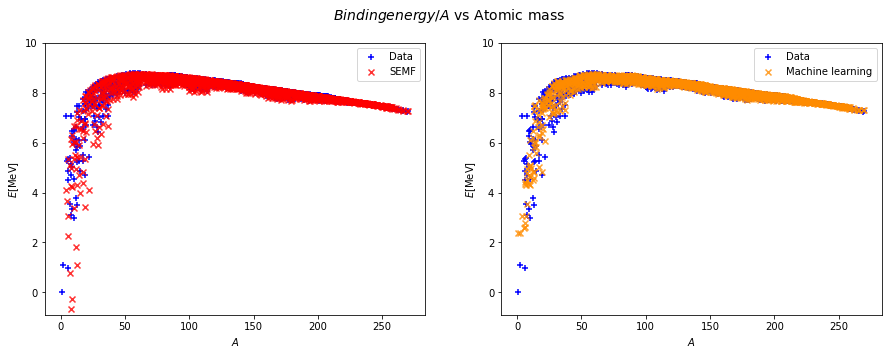

In [ ]:
np.random.seed(2)


infile = open('/content/drive/Shareddrives/MSc 1 Sem 2/Atomic and Nuclear/AME2020.txt','r')
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12),
              header=2,
              index_col=False)


Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
Masses['Ebinding'] /= 1000

Z=Masses['Z']
N=Masses['N']
Z=np.array(Z)
N=np.array(N)
A = Masses['A']
A=np.array(A)
Energies = Masses['Ebinding']
Energies=np.array(Energies)
index=np.arange(0,len(A))
print(len(A))
ri=np.random.choice(index,1100,replace=False)
Etrain=[]
Atrain=[]

Ztrain=[]
Ntrain=[]
for i in ri:
  e1=Energies[i]
  a1=A[i]
  z1=Z[i]
  n1=N[i]
  Etrain.append(e1)
  Atrain.append(a1)
  Ztrain.append(z1)
  Ntrain.append(n1)
Etest=np.delete(Energies,ri)
Atest=np.delete(A,ri)
Ntest=np.delete(N,ri)
Ztest=np.delete(Z,ri)

Eapptrain=SEMF(Ztrain,Ntrain)
Eapptest=SEMF(Ztest,Ntest)

X = np.zeros((2,len(Atrain)))
X[0,:] = Ztrain
X[1,:] = Ntrain



regr_3=RandomForestRegressor(max_depth=30)

regr_3.fit(X.T, Etrain)
Xtest = np.zeros((2,len(Atest)))

Xtest[0,:]=Ztest
Xtest[1,:]=Ntest


y_3=regr_3.predict(Xtest.T)

err1=(mean_squared_error(Etest,y_3,squared=False))


err2=mean_squared_error(Etest,Eapptest,squared=False)
print('error for independent ml model: ',err1,'\nerror for SEMF: ',err2)




fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax1.scatter(Atest, Eapptest, color="red", label="SEMF", marker='x',alpha=0.8)
ax1.set_ylim(-0.9,10)
ax2.set_ylim(-0.9,10)
ax2.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax2.scatter(Atest, y_3, color="darkorange", label="Machine learning", marker='x',alpha=0.8)
ax1.set_xlabel(r'$A$')
ax1.set_ylabel(r"$E$[MeV]")
ax2.set_xlabel(r'$A$')
ax2.set_ylabel(r"$E$[MeV]")
fig.suptitle("$Binding energy/A$ vs Atomic mass ",fontsize=14)
ax1.legend()
ax2.legend()
plt.show()

## .

In [ ]:
Serm1=Etrain-Eapptrain

SXer= np.zeros((2,len(Serm1)))
SXer[0,:] = Ztrain
SXer[1,:] = Ntrain
SErr_model=RandomForestRegressor().fit(SXer.T,Serm1)
Serr_pred1= SErr_model.predict(SXer.T)

Serm2=Serm1-Serr_pred1
SErr_model1=RandomForestRegressor().fit(SXer.T,Serm2)
Serr_pred2= SErr_model1.predict(SXer.T)


SXtest= np.zeros((2,len(Ztest)))
SXtest[0,:] = Ztest
SXtest[1,:] = Ntest
Sy_1=SEMF(Ztest,Ntest)
Sy=SErr_model.predict(SXtest.T)
Sy1=SErr_model1.predict(SXtest.T)

Serr_fit=Sy_1+Sy
Serrfit_err1=mean_squared_error(Etest,Serr_fit,squared=False)

print(Serrfit_err1)

0.9278077552217294


# ***Hybrid Machine Learning Model***

##For Stable Isotopes



error for ml built on theoretical:  0.09300376764642405 
error for SEMF:  0.3400963895933706


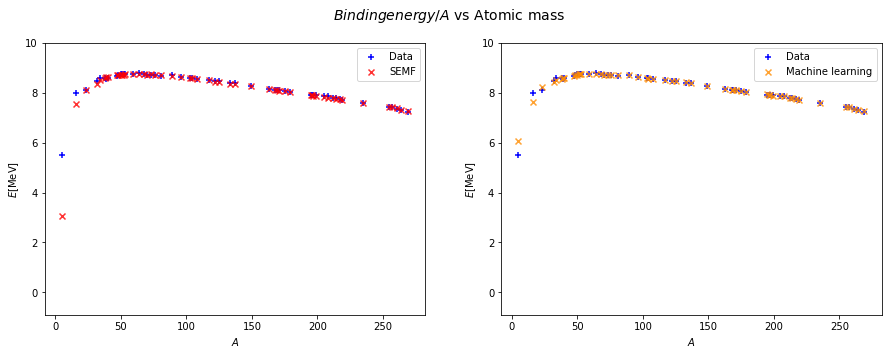

            N    Z    A Element  Ebinding
A                                        
1   0       0    1    1       H  0.000000
2   1       1    1    2       H  1.112283
3   2       2    1    3       H  2.827265
4   6       2    2    4      He  7.073916
5   9       3    2    5      He  5.512132
...       ...  ...  ...     ...       ...
264 3402  156  108  264      Hs  7.298376
265 3408  157  108  265      Hs  7.296247
266 3415  158  108  266      Hs  7.298261
269 3436  159  110  269      Ds  7.250155
270 3442  160  110  270      Ds  7.253763

[267 rows x 5 columns]


In [ ]:
np.random.seed(2)
infile = open('/content/drive/Shareddrives/MSc 1 Sem 2/Atomic and Nuclear/AME2020.txt','r')
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12),
              header=2,
              index_col=False)

Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
Masses['Ebinding'] /= 1000
Masses = Masses.groupby('A')
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])
Z=Masses['Z']
N=Masses['N']
Z=np.array(Z)
N=np.array(N)
A = Masses['A']
A=np.array(A)
Energies = Masses['Ebinding']
Energies=np.array(Energies)
index=np.arange(0,len(A))
ri=np.random.choice(index,213,replace=False)
Etrain=[]
Atrain=[]

Ztrain=[]
Ntrain=[]
for i in ri:
  e1=Energies[i]
  a1=A[i]
  z1=Z[i]
  n1=N[i]
  Etrain.append(e1)
  Atrain.append(a1)
  Ztrain.append(z1)
  Ntrain.append(n1)
Etest=np.delete(Energies,ri)
Atest=np.delete(A,ri)
Ntest=np.delete(N,ri)
Ztest=np.delete(Z,ri)

Eapptrain=SEMF(Ztrain,Ntrain)
Eapptest=SEMF(Ztest,Ntest)


X = np.zeros((2,len(Atrain)))
X[0,:] = Atrain
X[1,:] = Eapptrain


regr_3=RandomForestRegressor(max_depth=30)

regr_3.fit(X.T, Etrain)
Xtest = np.zeros((2,len(Atest)))
Xtest[0,:] = Atest
Xtest[1,:] = Eapptest

y_3=regr_3.predict(Xtest.T)

err1=(mean_squared_error(Etest,y_3,squared=False))


err2=mean_squared_error(Etest,Eapptest,squared=False)
print('error for ml built on theoretical: ',err1,'\nerror for SEMF: ',err2)





# Plot the results
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax1.scatter(Atest, Eapptest, color="red", label="SEMF", marker='x',alpha=0.8)
ax2.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax2.scatter(Atest, y_3, color="darkorange", label="Machine learning", marker='x',alpha=0.8)
ax1.set_xlabel(r'$A$')
ax1.set_ylabel(r"$E$[MeV]")
ax2.set_xlabel(r'$A$')
ax2.set_ylabel(r"$E$[MeV]")
ax1.set_ylim(-0.9,10)
ax2.set_ylim(-0.9,10)
fig.suptitle("$Binding energy/A$ vs Atomic mass ",fontsize=14)
ax1.legend()
ax2.legend()
plt.show()
print(Masses)
Masses.to_csv('/content/drive/Shareddrives/MSc 1 Sem 2/Atomic and Nuclear/M.csv')


##For All Isotopes

error for ml built on SEMF 0.09464530505887712 error for SEMF 1.0382852227640964


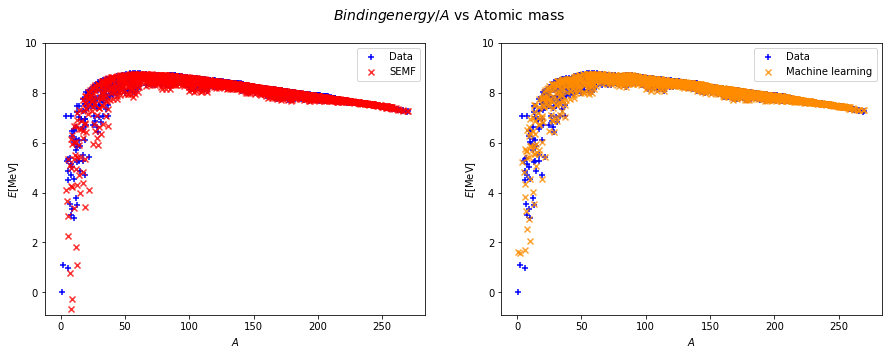

In [ ]:
np.random.seed(2)

infile = open('/content/drive/Shareddrives/MSc 1 Sem 2/Atomic and Nuclear/AME2020.txt','r')
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12),
              header=2,
              index_col=False)

Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
Masses['Ebinding'] /= 1000

Z=Masses['Z']
N=Masses['N']
Z=np.array(Z)
N=np.array(N)
A = Masses['A']
A=np.array(A)
Energies = Masses['Ebinding']
Energies=np.array(Energies)
index=np.arange(0,len(A))
ri=np.random.choice(index,1100,replace=False)
Etrain=[]
Atrain=[]

Ztrain=[]
Ntrain=[]
for i in ri:
  e1=Energies[i]
  a1=A[i]
  z1=Z[i]
  n1=N[i]
  Etrain.append(e1)
  Atrain.append(a1)
  Ztrain.append(z1)
  Ntrain.append(n1)
Etest=np.delete(Energies,ri)
Atest=np.delete(A,ri)
Ntest=np.delete(N,ri)
Ztest=np.delete(Z,ri)

Eapptrain=SEMF(Ztrain,Ntrain)
Eapptest=SEMF(Ztest,Ntest)



X = np.zeros((3,len(Atrain)))
X[1,:] = Eapptrain
X[2,:] = Ntrain
X[0,:] = Ztrain


regr_3=RandomForestRegressor(max_depth=30)

regr_3.fit(X.T, Etrain)
Xtest = np.zeros((3,len(Atest)))

Xtest[1,:] = Eapptest
Xtest[2,:]=Ntest
Xtest[0,:]=Ztest

y_3=regr_3.predict(Xtest.T)



err1=(mean_squared_error(Etest,y_3,squared=False))
err2=mean_squared_error(Etest,Eapptest,squared=False)
print('error for ml built on SEMF',err1,'error for SEMF',err2)




fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax1.scatter(Atest, Eapptest, color="red", label="SEMF", marker='x',alpha=0.8)
ax2.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax2.scatter(Atest, y_3, color="darkorange", label="Machine learning", marker='x',alpha=0.8)
ax1.set_xlabel(r'$A$')
ax1.set_ylabel(r"$E$[MeV]")
ax2.set_xlabel(r'$A$')
ax2.set_ylabel(r"$E$[MeV]")
fig.suptitle("$Binding energy/A$ vs Atomic mass ",fontsize=14)
ax1.legend()
ax2.legend()
ax1.set_ylim(-0.9,10)
ax2.set_ylim(-0.9,10)
plt.show()

## *Error Model:*

In [ ]:
np.random.seed(2)
y_full=regr_3.predict(X.T)
erm1=Etrain-y_full

Xer= np.zeros((3,len(erm1)))
Xer[0,:] = Ztrain
Xer[1,:] = Ntrain
Xer[2,:] = Eapptrain
#Xer[3,:] = Atrain
Err_model=RandomForestRegressor().fit(Xer.T,erm1)
er_pred1= Err_model.predict(Xer.T)


erm2=erm1-er_pred1   #error of first error model


Err_model2=RandomForestRegressor().fit(Xer.T,erm2)
er_pred2= Err_model2.predict(Xer.T)


Xtest1 = np.zeros((3,len(Atest)))
Xtest1[0,:] = Ztest
Xtest1[1,:] = Ntest
Xtest1[2,:] = Eapptest
#Xtest1[3,:] = Atest
y= Err_model.predict(Xtest1.T)
y2=Err_model2.predict(Xtest1.T)
level0=y_3
level1=y_3+y
level2=y_3+y+y2


errfit_err0=mean_squared_error(Etest,level0,squared=False)
errfit_err1=mean_squared_error(Etest,level1,squared=False)
errfit_err2=mean_squared_error(Etest,level2,squared=False)
print('error for level 0: ',errfit_err0,'\nerror for level 1: ',errfit_err1,'\nerror for level 2: ',errfit_err2)

error for level 0:  0.09464530505887712 
error for level 1:  0.08685291658898774 
error for level 2:  0.0852027327980714


## *Plots:*

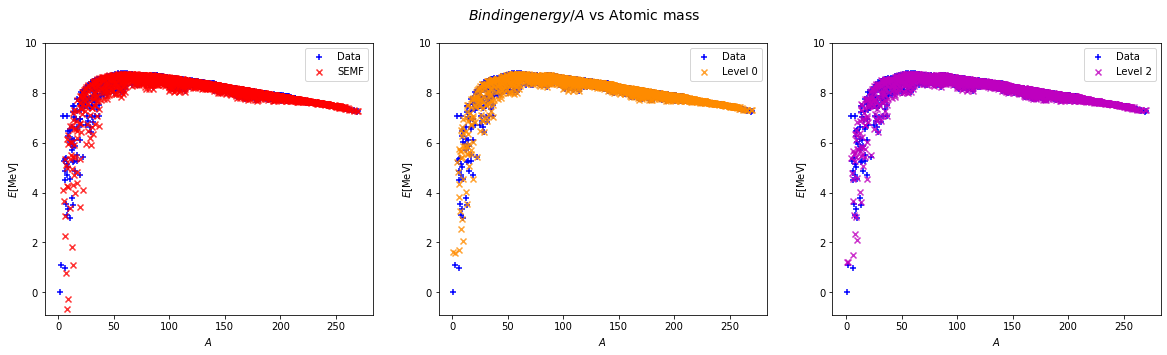

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
ax1.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax1.scatter(Atest, Eapptest, color="red", label="SEMF", marker='x',alpha=0.8)
ax2.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax2.scatter(Atest, level0, color="darkorange", label="Level 0", marker='x',alpha=0.8)
ax3.scatter(Atest, Etest, color="blue", label="Data", marker='+')
ax3.scatter(Atest, level2, color="m", label="Level 2", marker='x',alpha=0.8)
ax1.set_xlabel(r'$A$')
ax1.set_ylabel(r"$E$[MeV]")
ax2.set_xlabel(r'$A$')
ax2.set_ylabel(r"$E$[MeV]")
ax3.set_xlabel(r'$A$')
ax3.set_ylabel(r"$E$[MeV]")
fig.suptitle("$Binding energy/A$ vs Atomic mass ",fontsize=14)
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_ylim(-0.9,10)
ax2.set_ylim(-0.9,10)
ax3.set_ylim(-0.9,10)
plt.show()

## Deviation *plots*

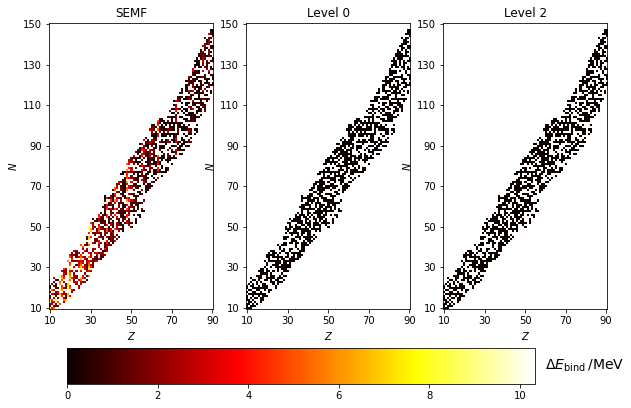

In [ ]:

Ztest1, Ntest1 = np.meshgrid(Ztest, Ntest)
# Add a column of estimated binding energies calculated using the SEMF.
Ebind = SEMF(Ztest1, Ntest1)

avEbind = np.empty_like(Ebind)
Emlmesh=np.empty_like(Ebind)
Emlmesh3=np.empty_like(Ebind)
avEbind[:] = np.nan
Emlmesh[:] = np.nan
Emlmesh3[:] = np.nan

# NB pesky meshgrid messes with the ordering by default, so indexes are N, Z
avEbind[Ntest-1, Ztest-1] = Etest
Emlmesh[Ntest-1, Ztest-1] = level0
Emlmesh3[Ntest-1, Ztest-1] = level2
Ebind[np.isnan(avEbind)] = np.nan
Emlmesh[np.isnan(avEbind)] = np.nan
Emlmesh3[np.isnan(avEbind)] = np.nan


Nmin, Nmax, Zmin, Zmax = 10, 150, 10, 90
avEbind = avEbind[Nmin-1:Nmax,Zmin-1:Zmax]
Ebind= Ebind[Nmin-1:Nmax,Zmin-1:Zmax]
Emlmesh= Emlmesh[Nmin-1:Nmax,Zmin-1:Zmax]
Emlmesh3= Emlmesh3[Nmin-1:Nmax,Zmin-1:Zmax]
err = np.abs(avEbind - Ebind)
vmax = np.nanmax(err)
err1 = np.abs(avEbind - Emlmesh)
vmax1 = np.nanmax(err1)
err3 = np.abs(avEbind - Emlmesh3)
vmax3 = np.nanmax(err3)
vmax=np.max((vmax1,vmax,vmax3)) #taking a common max value
#plotting deviation
fig, (ax,ax1,ax3) = plt.subplots(1,3,figsize=(10,10))
im = ax.imshow(err, interpolation='nearest', origin='lower',
                     cmap=cm.hot, vmin=0, vmax=vmax)
im1= ax1.imshow(err1, interpolation='nearest', origin='lower',
                     cmap=cm.hot, vmin=0, vmax=vmax)
im3 = ax3.imshow(err3, interpolation='nearest', origin='lower',
                     cmap=cm.hot, vmin=0, vmax=vmax)
ax.set_xticks(range(0, Zmax-Zmin+1, 20))
ax.set_xticklabels(range(Zmin, Zmax+1, 20))
ax.set_xlabel(r'$Z$')
ax.set_yticks(range(0, Nmax-Nmin+1, 20))
ax.set_yticklabels(range(Nmin, Nmax+1, 20))
ax.set_ylabel(r'$N$')


cbar_ax = fig.add_axes([0.15, 0.2, 0.65, 0.05])
fig.colorbar(im,cax=cbar_ax, orientation='horizontal')

cbar_ax.text(1.02,0.5,r'$\Delta E_\mathrm{bind}\,/\mathrm{MeV}$',
             transform=cbar_ax.transAxes, va='center', fontsize=14)

ax1.set_xticks(range(0, Zmax-Zmin+1, 20))

ax1.set_xticklabels(range(Zmin, Zmax+1, 20))
ax1.set_xlabel(r'$Z$')
ax1.set_yticks(range(0, Nmax-Nmin+1, 20))
ax1.set_yticklabels(range(Nmin, Nmax+1, 20))
ax1.set_ylabel(r'$N$')
# Adjust the axes upwards to make room for a horizontal colorbar.


# Label the colorbar with a text annotation in axes coordinates.

ax3.set_xticks(range(0, Zmax-Zmin+1, 20))

ax3.set_xticklabels(range(Zmin, Zmax+1, 20))
ax3.set_xlabel(r'$Z$')
ax3.set_yticks(range(0, Nmax-Nmin+1, 20))
ax3.set_yticklabels(range(Nmin, Nmax+1, 20))
ax3.set_ylabel(r'$N$')

ax.set_title('SEMF')
ax1.set_title('Level 0')
ax3.set_title('Level 2')

plt.savefig('SEMF-deviation.png')


## *Table:*

In [ ]:
import pandas as pd
errtab = (Etest - Eapptest)
errtab=np.array(errtab)
errtab0 = (Etest - level0)
errtab0=np.array(errtab0)
errtab1 =(Etest - level1)
errtab1=np.array(errtab1)
errtab2 = (Etest - level2)
errtab2=np.array(errtab2)

ttt={'Error in SEMF':errtab,'Error in level0':errtab0,'Error in level1':errtab1,'Error in level2':errtab2}
ERRORTABLE = pd.DataFrame(ttt)
ERRORTABLE.to_csv('/content/drive/Shareddrives/MSc 1 Sem 2/Atomic and Nuclear/Error_table.csv')
ERRORTABLE

,Error in SEMF,Error in level0,Error in level1,Error in level2
0,37.641000,-1.599988,-1.290331,-1.231673
1,3.725040,-0.465793,-0.152290,-0.093176
2,2.985115,1.859107,1.726384,1.692668
3,1.622067,0.428442,0.466618,0.480357
4,5.605903,-0.750883,-0.583805,-0.549664
...,...,...,...,...
1444,0.003359,-0.012010,-0.004082,-0.002721
1445,0.001157,-0.010356,0.000014,0.001643
1446,-0.001807,-0.037858,-0.029175,-0.027901
1447,-0.004241,-0.058285,-0.046978,-0.045652
